Nội dung file .names:
1. Title: Pima Indians Diabetes Database

2. Sources:
   (a) Original owners: National Institute of Diabetes and Digestive and
                        Kidney Diseases
   (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu)
                          Research Center, RMI Group Leader
                          Applied Physics Laboratory
                          The Johns Hopkins University
                          Johns Hopkins Road
                          Laurel, MD 20707
                          (301) 953-6231
   (c) Date received: 9 May 1990

3. Past Usage:
    1. Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., \&
       Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast
       the onset of diabetes mellitus.  In {\it Proceedings of the Symposium
       on Computer Applications and Medical Care} (pp. 261--265).  IEEE
       Computer Society Press.

       The diagnostic, binary-valued variable investigated is whe

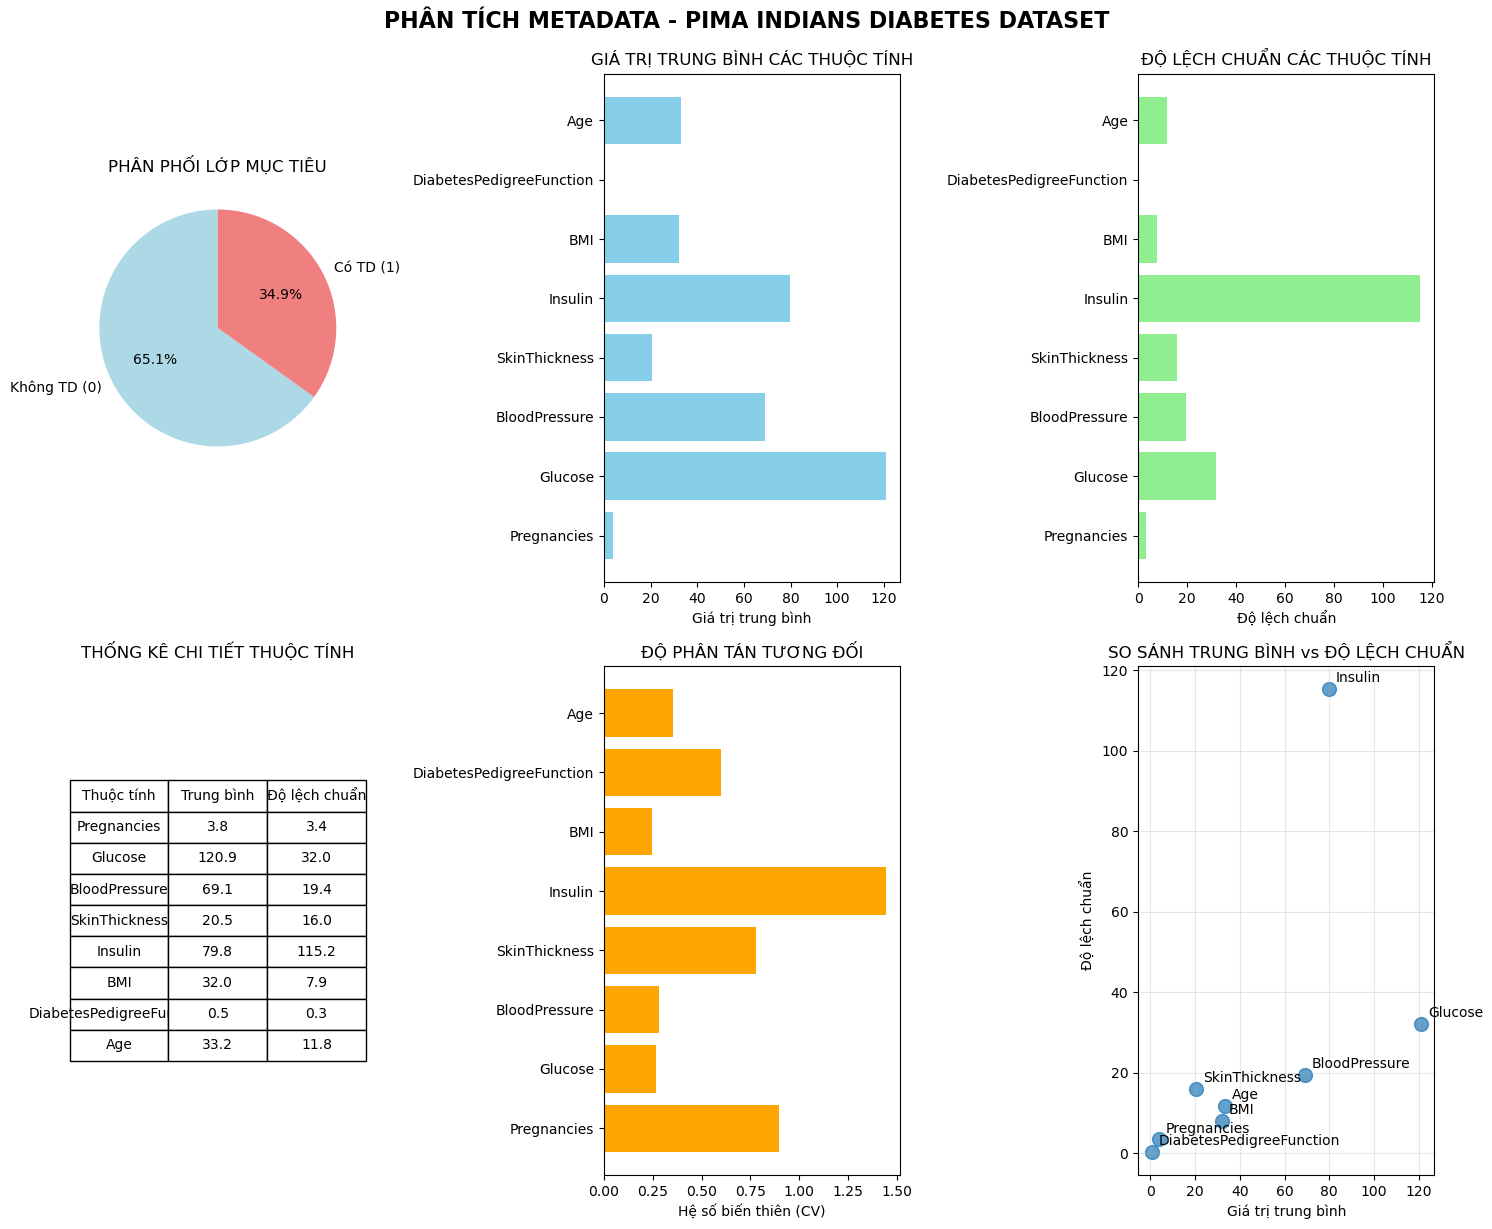


🔬 6. PHÂN TÍCH CHUYÊN SÂU
--------------------------------------------------
📈 PHÂN LOẠI ĐỘ BIẾN ĐỘNG:
   • Pregnancies: CV = 0.89 (Cao)
   • Glucose: CV = 0.26 (Thấp)
   • BloodPressure: CV = 0.28 (Thấp)
   • SkinThickness: CV = 0.78 (Cao)
   • Insulin: CV = 1.44 (Cao)
   • BMI: CV = 0.25 (Thấp)
   • DiabetesPedigreeFunction: CV = 0.60 (Trung bình)
   • Age: CV = 0.36 (Trung bình)

🏥 Ý NGHĨA Y HỌC:
• Glucose: Chỉ số đường huyết quan trọng nhất (WHO ngưỡng: 200 mg/dl)
• BMI: Chỉ số khối cơ thể (Bình thường: 18.5-24.9)
• BloodPressure: Huyết áp tâm trương (Bình thường: < 80 mmHg)
• Age: Tuổi là yếu tố nguy cơ quan trọng
• Insulin: Kháng insulin là dấu hiệu tiểu đường type 2

💡 7. ĐỀ XUẤT XỬ LÝ DỮ LIỆU
--------------------------------------------------
✅ Xử lý giá trị thiếu (đặc biệt Glucose, BloodPressure, BMI = 0)
✅ Chuẩn hóa dữ liệu do các thuộc tính có thang đo khác nhau
✅ Cân bằng dataset (tỷ lệ 65.1% vs 34.9%)
✅ Feature selection dựa trên correlation với Outcome
✅ Xử lý outliers (

In [1]:
# filename: pima_diabetes_names_analysis.py

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import fill

# filename: read_names_file.py

def read_names_file(filename='pima-indians-diabetes.names'):
    """
    Đọc và phân tích file .names nếu tồn tại
    """
    try:
        with open(filename, 'r') as file:
            content = file.read()
            print("Nội dung file .names:")
            print("=" * 50)
            print(content)
            print("=" * 50)
            
            # Phân tích cơ bản
            lines = content.split('\n')
            print(f"Số dòng trong file: {len(lines)}")
            
    except FileNotFoundError:
        print(f"File {filename} không tồn tại trong thư mục hiện tại")
        print("Sử dụng thông tin metadata đã được cung cấp")

# Chạy hàm đọc file
read_names_file()

# ==================== PHÂN TÍCH FILE .NAMES ====================
print("=" * 70)
print("PHÂN TÍCH FILE: pima-indians-diabetes.names")
print("=" * 70)

# Thông tin từ file .names
dataset_info = {
    'title': "Pima Indians Diabetes Database",
    'sources': {
        'original_owners': "National Institute of Diabetes and Digestive and Kidney Diseases",
        'donor': "Vincent Sigillito (vgs@aplcen.apl.jhu.edu)",
        'affiliation': "Research Center, RMI Group Leader, Applied Physics Laboratory, The Johns Hopkins University",
        'location': "Johns Hopkins Road, Laurel, MD 20707",
        'phone': "(301) 953-6231",
        'date_received': "9 May 1990"
    },
    'past_usage': {
        'reference': "Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.",
        'publication': "Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261-265). IEEE Computer Society Press.",
        'criteria': "WHO criteria: 2-hour post-load plasma glucose ≥ 200 mg/dl",
        'population': "Population lives near Phoenix, Arizona, USA",
        'algorithm': "ADAP algorithm with cutoff 0.448",
        'performance': "76% sensitivity and specificity on 192 test instances"
    },
    'relevant_info': {
        'constraints': "All patients are females at least 21 years old of Pima Indian heritage",
        'algorithm_desc': "ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices"
    },
    'statistics': {
        'instances': 768,
        'attributes': 8,
        'class_distribution': {'0': 500, '1': 268},
        'attribute_stats': {
            'Pregnancies': {'mean': 3.8, 'std': 3.4},
            'Glucose': {'mean': 120.9, 'std': 32.0},
            'BloodPressure': {'mean': 69.1, 'std': 19.4},
            'SkinThickness': {'mean': 20.5, 'std': 16.0},
            'Insulin': {'mean': 79.8, 'std': 115.2},
            'BMI': {'mean': 32.0, 'std': 7.9},
            'DiabetesPedigreeFunction': {'mean': 0.5, 'std': 0.3},
            'Age': {'mean': 33.2, 'std': 11.8}
        }
    }
}

# ==================== HIỂN THỊ THÔNG TIN TỔNG QUAN ====================
def print_wrapped(text, width=70):
    """In văn bản với độ dài cố định"""
    print(fill(text, width=width))

print("\n📋 1. THÔNG TIN CƠ BẢN")
print("-" * 50)
print(f"📊 Tiêu đề: {dataset_info['title']}")
print(f"👥 Đối tượng: {dataset_info['relevant_info']['constraints']}")
print(f"📅 Ngày nhận: {dataset_info['sources']['date_received']}")

print("\n🏢 2. NGUỒN DỮ LIỆU")
print("-" * 50)
print(f"📍 Tổ chức: {dataset_info['sources']['original_owners']}")
print(f"👤 Người tặng: {dataset_info['sources']['donor']}")
print(f"🏛️ Đơn vị: {dataset_info['sources']['affiliation']}")
print(f"📞 Liên hệ: {dataset_info['sources']['phone']}")

print("\n📚 3. SỬ DỤNG TRƯỚC ĐÂY")
print("-" * 50)
print_wrapped(f"📖 Nghiên cứu: {dataset_info['past_usage']['reference']}")
print_wrapped(f"🏥 Tiêu chuẩn: {dataset_info['past_usage']['criteria']}")
print_wrapped(f"🌍 Quần thể: {dataset_info['past_usage']['population']}")
print(f"🤖 Thuật toán: {dataset_info['past_usage']['algorithm']}")
print(f"📈 Hiệu suất: {dataset_info['past_usage']['performance']}")

print("\n🔍 4. THÔNG TIN LIÊN QUAN")
print("-" * 50)
print_wrapped(f"📝 Mô tả: {dataset_info['relevant_info']['algorithm_desc']}")

# ==================== THỐNG KÊ DỮ LIỆU ====================
print("\n📊 5. THỐNG KÊ DỮ LIỆU")
print("-" * 50)
print(f"📈 Số lượng mẫu: {dataset_info['statistics']['instances']}")
print(f"🔢 Số thuộc tính: {dataset_info['statistics']['attributes']} + class")

class_dist = dataset_info['statistics']['class_distribution']
total = class_dist['0'] + class_dist['1']
ratio_0 = (class_dist['0'] / total) * 100
ratio_1 = (class_dist['1'] / total) * 100

print(f"\n🎯 PHÂN PHỐI LỚP:")
print(f"   • Lớp 0 (Không tiểu đường): {class_dist['0']} mẫu ({ratio_0:.1f}%)")
print(f"   • Lớp 1 (Có tiểu đường): {class_dist['1']} mẫu ({ratio_1:.1f}%)")

print(f"\n⚠️  Giá trị thiếu: Có (theo metadata)")

# ==================== TẠO BIỂU ĐỒ TỪ METADATA ====================
plt.figure(figsize=(15, 12))

# 1. Biểu đồ phân phối lớp
plt.subplot(2, 3, 1)
classes = ['Không TD (0)', 'Có TD (1)']
counts = [class_dist['0'], class_dist['1']]
colors = ['lightblue', 'lightcoral']
plt.pie(counts, labels=classes, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('PHÂN PHỐI LỚP MỤC TIÊU')

# 2. Biểu đồ giá trị trung bình các thuộc tính
plt.subplot(2, 3, 2)
attributes = list(dataset_info['statistics']['attribute_stats'].keys())
means = [stats['mean'] for stats in dataset_info['statistics']['attribute_stats'].values()]
plt.barh(attributes, means, color='skyblue')
plt.xlabel('Giá trị trung bình')
plt.title('GIÁ TRỊ TRUNG BÌNH CÁC THUỘC TÍNH')
plt.tight_layout()

# 3. Biểu đồ độ lệch chuẩn
plt.subplot(2, 3, 3)
stds = [stats['std'] for stats in dataset_info['statistics']['attribute_stats'].values()]
plt.barh(attributes, stds, color='lightgreen')
plt.xlabel('Độ lệch chuẩn')
plt.title('ĐỘ LỆCH CHUẨN CÁC THUỘC TÍNH')

# 4. Bảng thống kê chi tiết
plt.subplot(2, 3, 4)
# Tạo bảng dữ liệu
table_data = []
for attr, stats in dataset_info['statistics']['attribute_stats'].items():
    table_data.append([attr, f"{stats['mean']:.1f}", f"{stats['std']:.1f}"])

# Ẩn trục để hiển thị bảng
plt.axis('tight')
plt.axis('off')
table = plt.table(cellText=table_data,
                  colLabels=['Thuộc tính', 'Trung bình', 'Độ lệch chuẩn'],
                  loc='center',
                  cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)
plt.title('THỐNG KÊ CHI TIẾT THUỘC TÍNH')

# 5. Biểu đồ hệ số biến thiên (CV)
plt.subplot(2, 3, 5)
cv_values = [stats['std']/stats['mean'] for stats in dataset_info['statistics']['attribute_stats'].values()]
plt.barh(attributes, cv_values, color='orange')
plt.xlabel('Hệ số biến thiên (CV)')
plt.title('ĐỘ PHÂN TÁN TƯƠNG ĐỐI')

# 6. Biểu đồ so sánh Mean vs STD
plt.subplot(2, 3, 6)
plt.scatter(means, stds, s=100, alpha=0.7)
for i, attr in enumerate(attributes):
    plt.annotate(attr, (means[i], stds[i]), xytext=(5, 5), textcoords='offset points')
plt.xlabel('Giá trị trung bình')
plt.ylabel('Độ lệch chuẩn')
plt.title('SO SÁNH TRUNG BÌNH vs ĐỘ LỆCH CHUẨN')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('PHÂN TÍCH METADATA - PIMA INDIANS DIABETES DATASET', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

# ==================== PHÂN TÍCH CHUYÊN SÂU ====================
print("\n🔬 6. PHÂN TÍCH CHUYÊN SÂU")
print("-" * 50)

# Phân loại thuộc tính theo độ biến động
print("📈 PHÂN LOẠI ĐỘ BIẾN ĐỘNG:")
for attr, stats in dataset_info['statistics']['attribute_stats'].items():
    cv = stats['std'] / stats['mean']
    if cv < 0.3:
        level = "Thấp"
    elif cv < 0.7:
        level = "Trung bình"
    else:
        level = "Cao"
    print(f"   • {attr}: CV = {cv:.2f} ({level})")

# Phân tích ý nghĩa y học
print("\n🏥 Ý NGHĨA Y HỌC:")
medical_insights = [
    "• Glucose: Chỉ số đường huyết quan trọng nhất (WHO ngưỡng: 200 mg/dl)",
    "• BMI: Chỉ số khối cơ thể (Bình thường: 18.5-24.9)",
    "• BloodPressure: Huyết áp tâm trương (Bình thường: < 80 mmHg)",
    "• Age: Tuổi là yếu tố nguy cơ quan trọng",
    "• Insulin: Kháng insulin là dấu hiệu tiểu đường type 2"
]
for insight in medical_insights:
    print(insight)

# ==================== ĐỀ XUẤT XỬ LÝ ====================
print("\n💡 7. ĐỀ XUẤT XỬ LÝ DỮ LIỆU")
print("-" * 50)
recommendations = [
    "✅ Xử lý giá trị thiếu (đặc biệt Glucose, BloodPressure, BMI = 0)",
    "✅ Chuẩn hóa dữ liệu do các thuộc tính có thang đo khác nhau",
    "✅ Cân bằng dataset (tỷ lệ 65.1% vs 34.9%)",
    "✅ Feature selection dựa trên correlation với Outcome",
    "✅ Xử lý outliers (đặc biệt Insulin có độ lệch chuẩn cao)",
    "✅ Sử dụng algorithms phù hợp với dữ liệu y tế",
    "✅ Cross-validation để đánh giá hiệu suất ổn định"
]

for i, rec in enumerate(recommendations, 1):
    print(f"{rec}")

# ==================== KẾT LUẬN ====================
print("\n🎯 8. KẾT LUẬN")
print("-" * 50)
conclusions = [
    f"• Dataset có {dataset_info['statistics']['instances']} mẫu từ nữ giới Pima Indian ≥ 21 tuổi",
    "• Mục tiêu: Dự đoán tiểu đường theo tiêu chuẩn WHO",
    "• Các thuộc tính quan trọng: Glucose, BMI, Age, BloodPressure",
    "• Cần xử lý giá trị thiếu và cân bằng lớp",
    "• Phù hợp cho classification algorithms trong y tế"
]

for conclusion in conclusions:
    print(conclusion)

print("\n" + "=" * 70)
print("PHÂN TÍCH METADATA HOÀN TẤT!")
print("=" * 70)